In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras import models, layers

In [2]:
BATCH_SIZE = 10
IMAGE_SIZE = 200
CHANNELS = 3
EPOCHS = 10

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PokemonData",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 6820 files belonging to 150 classes.


In [5]:
class_names = dataset.class_names
class_names

['Abra',
 'Aerodactyl',
 'Alakazam',
 'Alolan Sandslash',
 'Arbok',
 'Arcanine',
 'Articuno',
 'Beedrill',
 'Bellsprout',
 'Blastoise',
 'Bulbasaur',
 'Butterfree',
 'Caterpie',
 'Chansey',
 'Charizard',
 'Charmander',
 'Charmeleon',
 'Clefable',
 'Clefairy',
 'Cloyster',
 'Cubone',
 'Dewgong',
 'Diglett',
 'Ditto',
 'Dodrio',
 'Doduo',
 'Dragonair',
 'Dragonite',
 'Dratini',
 'Drowzee',
 'Dugtrio',
 'Eevee',
 'Ekans',
 'Electabuzz',
 'Electrode',
 'Exeggcute',
 'Exeggutor',
 'Farfetchd',
 'Fearow',
 'Flareon',
 'Gastly',
 'Gengar',
 'Geodude',
 'Gloom',
 'Golbat',
 'Goldeen',
 'Golduck',
 'Golem',
 'Graveler',
 'Grimer',
 'Growlithe',
 'Gyarados',
 'Haunter',
 'Hitmonchan',
 'Hitmonlee',
 'Horsea',
 'Hypno',
 'Ivysaur',
 'Jigglypuff',
 'Jolteon',
 'Jynx',
 'Kabuto',
 'Kabutops',
 'Kadabra',
 'Kakuna',
 'Kangaskhan',
 'Kingler',
 'Koffing',
 'Krabby',
 'Lapras',
 'Lickitung',
 'Machamp',
 'Machoke',
 'Machop',
 'Magikarp',
 'Magmar',
 'Magnemite',
 'Magneton',
 'Mankey',
 'Marowak',
 '

(10, 200, 200, 3)
[149 140  45  24  83  58 138  97 119 133]


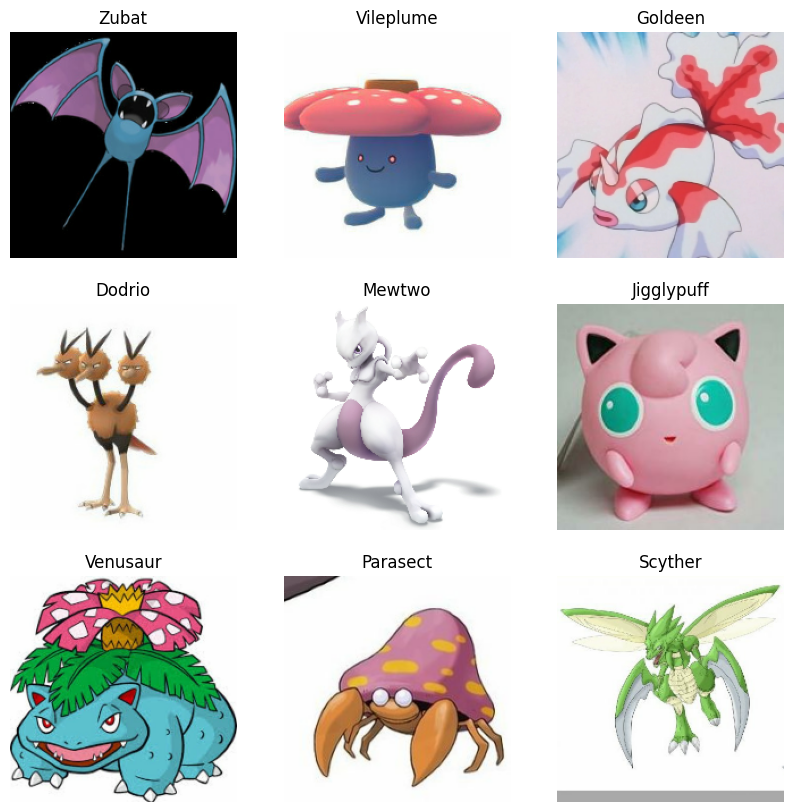

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(0,9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        

In [7]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1 #assert: 가정 설정문, 어떤 조건이든 True
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [9]:
len(train_ds)

545

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
])
#https://stackoverflow.com/questions/74792455/module-keras-layers-has-no-attribute-experimental

In [16]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomContrast(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

In [12]:
# train_ds = train_ds.map(
#     lambda x, y: (data_augmentation(x, training=True), y)
# ).prefetch(buffer_size=tf.data.AUTOTUNE)

In [30]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 7000

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(500, activation='relu'),
    # layers.Dense(1000, activation='relu'),
    # layers.Dense(10000, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_6 (ModuleWrap (10, 200, 200, 3)         0         
_________________________________________________________________
module_wrapper_7 (ModuleWrap (10, 200, 200, 3)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (10, 198, 198, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (10, 99, 99, 32)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (10, 97, 97, 64)          18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (10, 48, 48, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (10, 46, 46, 64)         

In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [37]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10
)

Epoch 1/10
545/545 [==============================] - 162s 298ms/step - loss: 5.2383 - accuracy: 0.0072 - val_loss: 5.0265 - val_accuracy: 0.0132
Epoch 2/10
545/545 [==============================] - 152s 279ms/step - loss: 5.0580 - accuracy: 0.0066 - val_loss: 5.0174 - val_accuracy: 0.0118
Epoch 3/10
545/545 [==============================] - 152s 279ms/step - loss: 5.0164 - accuracy: 0.0084 - val_loss: 4.7854 - val_accuracy: 0.0103
Epoch 4/10
545/545 [==============================] - 153s 281ms/step - loss: 4.6456 - accuracy: 0.0174 - val_loss: 4.4121 - val_accuracy: 0.0294
Epoch 5/10
545/545 [==============================] - 153s 281ms/step - loss: 4.2894 - accuracy: 0.0350 - val_loss: 4.0615 - val_accuracy: 0.0750
Epoch 6/10
545/545 [==============================] - 155s 285ms/step - loss: 4.0224 - accuracy: 0.0574 - val_loss: 3.8912 - val_accuracy: 0.0853
Epoch 7/10
545/545 [==============================] - 153s 280ms/step - loss: 3.7967 - accuracy: 0.0873 - val_loss: 3.4979 -

In [36]:
scores = model.evaluate(test_ds)

69/69 [==============================] - 9s 49ms/step - loss: 6.9987 - accuracy: 0.0101


In [38]:
scores

[6.998709201812744, 0.01014492753893137]

In [39]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 545}

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
history.history["loss"]

[5.238271713256836,
 5.058013439178467,
 5.016351222991943,
 4.645565509796143,
 4.289363861083984,
 4.022429943084717,
 3.79667329788208,
 3.4935224056243896,
 3.2998881340026855,
 3.1358368396759033]

In [42]:
history.history["accuracy"]

[0.007155963219702244,
 0.006605504546314478,
 0.008440366946160793,
 0.017431192100048065,
 0.03504587337374687,
 0.057431191205978394,
 0.08733944594860077,
 0.12238532304763794,
 0.14917431771755219,
 0.17724770307540894]

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

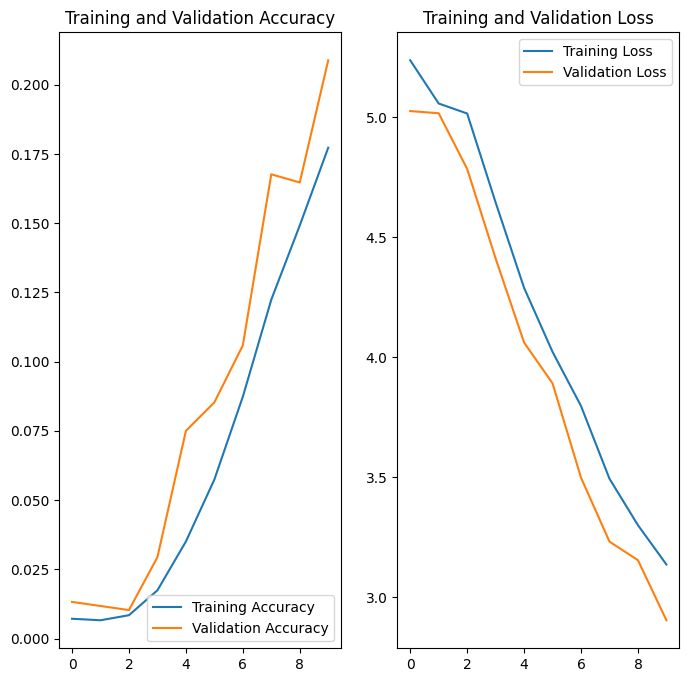

In [44]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()